# Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()

# Data Preprocessing

### Importing the Database

In [5]:
df = pd.read_csv('ml_datasource.csv')
df.head()

student_country  days_on_platform  minutes_watched  courses_started  \
0              US               288            358.1                1   
1              SG               260              1.7                1   
2              TR               260             22.4                1   
3              KE               259             18.8                1   
4              IN               259            118.0                2   

   practice_exams_started  practice_exams_passed  minutes_spent_on_exams  \
0                       2                      2                   15.81   
1                       1                      0                   16.00   
2                       1                      0                    0.93   
3                       1                      1                   14.63   
4                       2                      1                   16.48   

   purchased  
0          0  
1          0  
2          0  
3          0  
4          0

In [6]:
df.columns

Index(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased'],
      dtype='object')

In [7]:
#let's see how many students from Azerbaijan :)
df[df.student_country == 'AZ'].shape[0]

111

In [8]:
#let's see how many students from Korea :)
df[df.student_country == 'KR'].shape[0]

41

In [9]:
#To avoid accidentally modifying the original data source, we copy the raw data in a new variable
data = df.copy()

In [10]:
data.shape

(17761, 8)

### Removing Outliers

In [12]:
df.head()

student_country  days_on_platform  minutes_watched  courses_started  \
0              US               288            358.1                1   
1              SG               260              1.7                1   
2              TR               260             22.4                1   
3              KE               259             18.8                1   
4              IN               259            118.0                2   

   practice_exams_started  practice_exams_passed  minutes_spent_on_exams  \
0                       2                      2                   15.81   
1                       1                      0                   16.00   
2                       1                      0                    0.93   
3                       1                      1                   14.63   
4                       2                      1                   16.48   

   purchased  
0          0  
1          0  
2          0  
3          0  
4          0

In [71]:
df_numeric = df.select_dtypes(['number']) # select only numeric columns

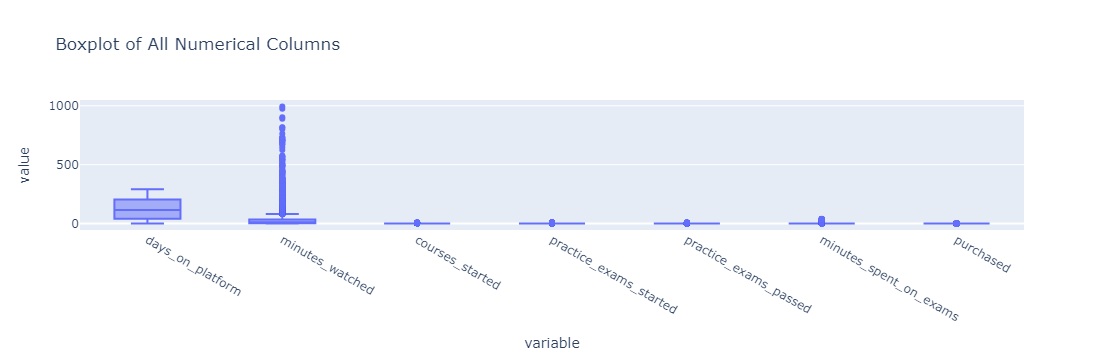

In [73]:
px.box(df_numeric, 
             points="outliers",  # by default outliers
             title="Boxplot of All Numerical Columns")

### Distibution plot of numeric columns

<Axes: xlabel='practice_exams_passed', ylabel='Density'>

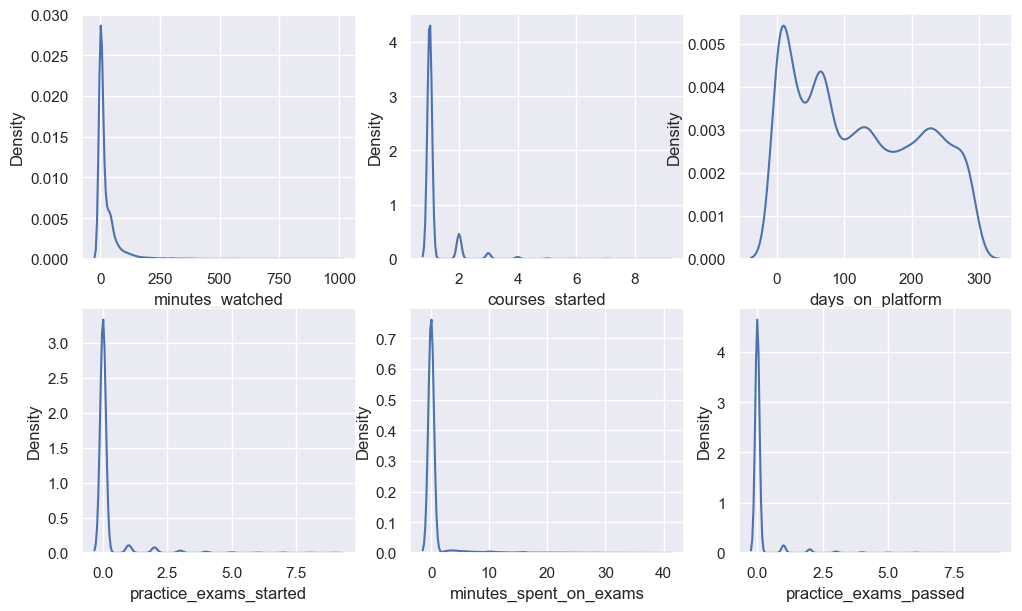

In [67]:
fig, axes = plt.subplots(2,3, figsize = (12,7))
sns.kdeplot(df.minutes_watched,ax = axes[0,0])
sns.kdeplot(df.courses_started,ax = axes[0,1])
sns.kdeplot(df.practice_exams_started,ax = axes[1,0])
sns.kdeplot(df.minutes_spent_on_exams,ax = axes[1,1])
sns.kdeplot(df.days_on_platform,ax = axes[0,2])
sns.kdeplot(df.practice_exams_passed,ax = axes[1,2])

In [17]:
#Remove the minutes watched larger than 1,000
df = df[df.minutes_watched<1000]

In [18]:
# Remove the number of courses surpassing 10
df = df[df.courses_started<10]

In [19]:
# Remove number of practice exams started higher than 10
df = df[df.practice_exams_started <10]

In [20]:
# Remove the minutes go beyond 40 mins
df = df[df.minutes_spent_on_exams < 40]

### Checking for Multicollinearity

In [65]:
df.head()

student_country  days_on_platform  minutes_watched  courses_started  \
0              US               288            358.1                1   
1              SG               260              1.7                1   
2              TR               260             22.4                1   
3              KE               259             18.8                1   
4              IN               259            118.0                2   

   practice_exams_started  practice_exams_passed  minutes_spent_on_exams  \
0                       2                      2                   15.81   
1                       1                      0                   16.00   
2                       1                      0                    0.93   
3                       1                      1                   14.63   
4                       2                      1                   16.48   

   purchased  
0          0  
1          0  
2          0  
3          0  
4          0

In [22]:
#we should go through numeric columns only in order to calculate VIF values of columns
def calculate_vif_values(df):
    df_new = pd.DataFrame()
    df_new['col_names'] = df_numeric.columns
    df_new['vif_values'] = [variance_inflation_factor(df_numeric.values,x) for x in range(df_numeric.shape[1])]
    return df_new

In [23]:
calculate_vif_values(df_numeric)
#there are only 2 columns with the VIF value more than 5

col_names  vif_values
0        days_on_platform    2.374338
1         minutes_watched    2.168408
2         courses_started    3.287673
3  practice_exams_started    7.801714
4   practice_exams_passed    6.645796
5  minutes_spent_on_exams    3.726018
6               purchased    1.185069

In [24]:
#Let's remove the column with highest VIF
df_no_mult = df.drop(columns ='practice_exams_started')

In [25]:
#now let's inspect VIF values of the remaining columns  
df_no_mult_numeric = df_no_mult.select_dtypes(['number'])

In [75]:
calculate_vif_values(df_no_mult_numeric)

col_names  vif_values
0        days_on_platform    2.497380
1         minutes_watched    1.813198
2         courses_started    3.509656
3  practice_exams_started   10.499858
4   practice_exams_passed    8.045240
5  minutes_spent_on_exams    3.330827
6               purchased    1.229174

### Dealing with NaN Values

### Splitting the Data

### Encoding the Data

# Creating a Logistic Regression Model

# Creating a K-Nearest Neighbors Model

# Creating a Support Vector Machines Model

# Creating a Decision Trees Model

# Creating a Random Forests Model

In [ ]:
# data is imbalanced. you are supposed to deal with it,
# in multicollinarity delete purch column